In [1]:

# STEP 1 — Clone the starter pack
!git clone https://github.com/hide-ous/semeval26_task10_starter_pack.git
%cd semeval26_task10_starter_pack

# Install required libraries
!pip install -q pandas matplotlib seaborn numpy datasets sentencepiece transformers


Cloning into 'semeval26_task10_starter_pack'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 102 (delta 55), reused 68 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (102/102), 47.03 KiB | 1.15 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/semeval26_task10_starter_pack


In [2]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 783.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2

In [4]:
import os

print(os.listdir())


['train_one_span.py', 'infer_one_span.py', 'submission.zip', 'requirements.txt', 'dev_redacted.jsonl', 'LICENSE', 'submission_example.py', 'datasheet.md', 'infer_binary.py', 'rehydrate_data.py', 'eval_token.py', 'train_binary.py', 'README.md', 'eval_binary.py', '.gitignore', '.git']


In [5]:
from google.colab import files
uploaded = files.upload()
#from zenodo

Saving train_redacted.jsonl to train_redacted.jsonl


Run the rehydration script

In [6]:
!python rehydrate_data.py --input train_redacted.jsonl --output train_rehydrated.jsonl

/content/semeval26_task10_starter_pack/rehydrate_data.py:29: SyntaxWarning: invalid escape sequence '\W'
  return re.sub("http(.+)?(\W|$)", url_replacement_token, x)
Rehydrating comments:   0% 0/9 [00:00<?, ?it/s]/content/semeval26_task10_starter_pack/rehydrate_data.py:23: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  text = ' '.join(soup.findAll(string=True))
Rehydrating comments:  11% 1/9 [00:01<00:12,  1.59s/it]Warning: Could not rehydrate comment with id 't1_ewekgmh'
Rehydrating comments:  22% 2/9 [00:03<00:10,  1.51s/it]Warning: Could not rehydrate comment with id 't1_euna7wh'
Rehydrating comments:  33% 3/9 [00:04<00:08,  1.49s/it]Warning: Could not rehydrate comment with id 't1_f7yvawr'
Rehydrating comments:  44% 4/9 [00:05<00:07,  1.48s/it]Warning: Could not rehydrate comment with id 't1_fdhnr97'
Rehydrating comments:  56% 5/9 [00:07<00:05,  1.44s/it]Warning: Could not rehydrate comment with id 't1_ewtwg9o'
Reh

Confirm the data loads

In [8]:
import pandas as pd
import json

def load_jsonl(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            rows.append(json.loads(line))
    return pd.DataFrame(rows)

train = load_jsonl("train_rehydrated.jsonl")
dev = load_jsonl("dev_redacted.jsonl")   # dev is still redacted
print("Train:", train.shape)
print("Dev:", dev.shape)
train.head()


Train: (4316, 6)
Dev: (100, 3)


,_id,text,subreddit,conspiracy,markers,annotator
0,t1_f7ju17o,A great article on what's taking place in Boli...,conspiracy,Yes,"[{'startIndex': 8, 'endIndex': 15, 'type': 'Ev...",annotator_0
1,t1_k5c5yyz,Chris Lehto interviews Ashton Forbes about his...,HighStrangeness,Can't tell,[],annotator_1
2,t1_givys64,Germany has upset other EU member states by se...,europe,No,"[{'startIndex': 0, 'endIndex': 7, 'type': 'Act...",annotator_2
3,t1_joq538t,"Redditors are, just like most social media use...",Republican,Can't tell,"[{'startIndex': 0, 'endIndex': 9, 'type': 'Act...",annotator_3
4,t1_hlk1vci,u/DLWzll shared a couple days ago how the Virg...,ForwardPartyUSA,Can't tell,[],annotator_29


In [9]:

# 0. SETUP

import pandas as pd
import numpy as np
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import spacy

!pip install langdetect textblob
from langdetect import detect
from textblob import TextBlob

# Create folder for plots
os.makedirs("plots", exist_ok=True)


# 1. LOAD DATA


def load_jsonl(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            rows.append(json.loads(line))
    return pd.DataFrame(rows)

train = load_jsonl("train_rehydrated.jsonl")
dev   = load_jsonl("dev_rehydrated.jsonl")

print("Train shape:", train.shape)
print("Dev shape:", dev.shape)
train.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=4cad1bbdd7fc1b3f75ee945d58b0f90373b6c4e0cb4d111a251d4b16093d059a
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
Train shape: (4316, 6)
Dev shape: (100, 6)


,_id,text,subreddit,conspiracy,markers,annotator
0,t1_f7ju17o,A great article on what's taking place in Boli...,conspiracy,Yes,"[{'startIndex': 8, 'endIndex': 15, 'type': 'Ev...",annotator_0
1,t1_k5c5yyz,Chris Lehto interviews Ashton Forbes about his...,HighStrangeness,Can't tell,[],annotator_1
2,t1_givys64,Germany has upset other EU member states by se...,europe,No,"[{'startIndex': 0, 'endIndex': 7, 'type': 'Act...",annotator_2
3,t1_joq538t,"Redditors are, just like most social media use...",Republican,Can't tell,"[{'startIndex': 0, 'endIndex': 9, 'type': 'Act...",annotator_3
4,t1_hlk1vci,u/DLWzll shared a couple days ago how the Virg...,ForwardPartyUSA,Can't tell,[],annotator_29


In [10]:

# 2. BASIC OVERVIEW

print("Columns:", train.columns.tolist())
print("\nLabel counts:\n", train["conspiracy"].value_counts())
print("\nNumber of markers:\n", train["markers"].apply(len).value_counts())
print("\nSubreddit distribution:\n", train["subreddit"].value_counts().head(20))


Columns: ['_id', 'text', 'subreddit', 'conspiracy', 'markers', 'annotator']

Label counts:
 conspiracy
No            1990
Yes           1541
Can't tell     785
Name: count, dtype: int64

Number of markers:
 markers
5     697
0     695
4     546
6     469
3     406
7     348
8     235
2     214
9     164
10    109
1      99
11     61
12     60
13     50
14     46
15     28
16     18
17     17
19     10
18     10
20      8
23      6
22      4
25      3
21      3
30      3
24      3
27      2
31      1
32      1
Name: count, dtype: int64

Subreddit distribution:
 subreddit
conspiracy               727
PlanetToday               38
CoronavirusCirclejerk     36
centrist                  35
news                      35
TrueReddit                35
Bibleconspiracy           33
The_Donald                33
thelastpsychiatrist       33
politics                  32
sorceryofthespectacle     31
TopMindsOfReddit          31
collapse                  30
conspiracy_commons        30
geopolitics      

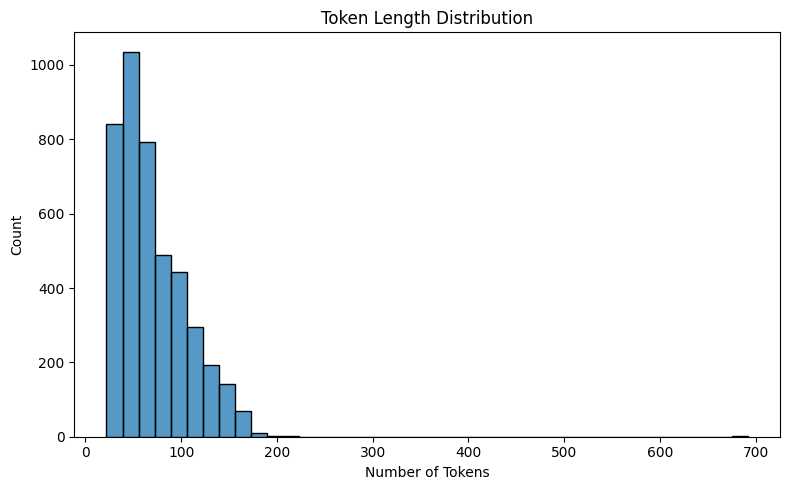

In [14]:

# 3. TOKEN LENGTH DISTRIBUTION

train["token_count"] = train["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(train["token_count"], bins=40)
plt.title("Token Length Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/token_length_distribution.pdf")
plt.show()


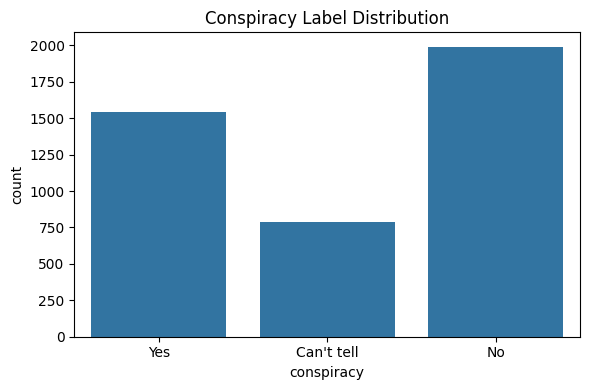

In [15]:

# 4. LABEL IMBALANCE

plt.figure(figsize=(6,4))
sns.countplot(x=train["conspiracy"])
plt.title("Conspiracy Label Distribution")
plt.tight_layout()
plt.savefig("plots/label_distribution.pdf")
plt.show()


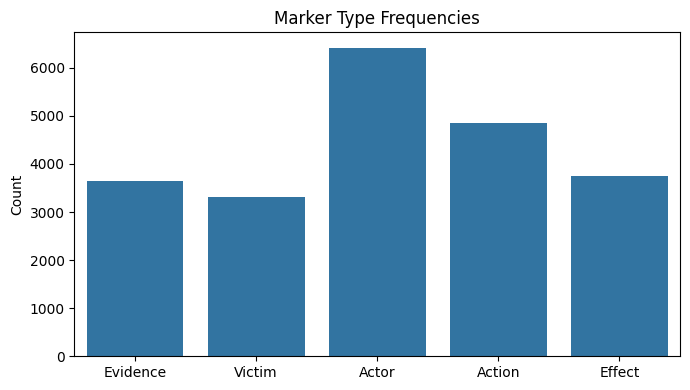

Counter({'Actor': 6416, 'Action': 4841, 'Effect': 3739, 'Evidence': 3654, 'Victim': 3315})


In [16]:

# 5. MARKER FREQUENCY

def extract_types(marker_list):
    return [m["type"] for m in marker_list]

all_types = train["markers"].apply(extract_types).sum()  # flatten list
type_counts = Counter(all_types)

plt.figure(figsize=(7,4))
sns.barplot(x=list(type_counts.keys()), y=list(type_counts.values()))
plt.title("Marker Type Frequencies")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/marker_type_frequency.pdf")
plt.show()

print(type_counts)


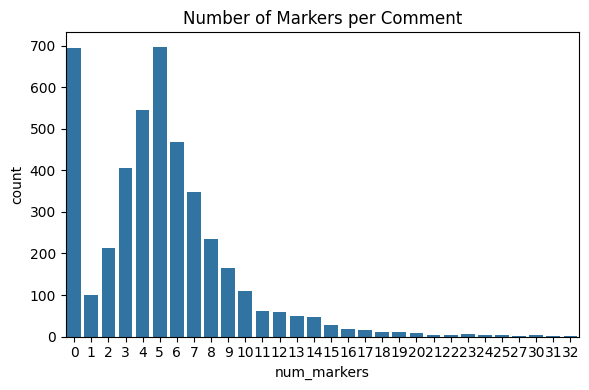

In [17]:
# 6. Number of markers per comment

train["num_markers"] = train["markers"].apply(len)

plt.figure(figsize=(6,4))
sns.countplot(x=train["num_markers"])
plt.title("Number of Markers per Comment")
plt.tight_layout()
plt.savefig("plots/markers_per_comment.pdf")
plt.show()


In [19]:

# 7. N-GRAM ANALYSIS


def get_top_ngrams(texts, n=2, top_k=20):
    tokens = " ".join(texts).lower().split()
    ng = list(ngrams(tokens, n))
    counter = Counter(ng)
    return counter.most_common(top_k)

bigrams = get_top_ngrams(train["text"], n=2)
trigrams = get_top_ngrams(train["text"], n=3)

print("Top 20 Bigrams:\n", bigrams)
print("\nTop 20 Trigrams:\n", trigrams)


Top 20 Bigrams:
 [(('of', 'the'), 1758), (('in', 'the'), 1288), (('to', 'the'), 750), (('this', 'is'), 620), (('is', 'a'), 577), (('on', 'the'), 553), (('and', 'the'), 530), (('to', 'be'), 516), (('for', 'the'), 447), (('from', 'the'), 356), (('it', 'is'), 351), (('that', 'the'), 350), (('of', 'a'), 327), (('in', 'a'), 317), (('at', 'the'), 314), (('has', 'been'), 312), (('with', 'the'), 307), (('is', 'the'), 289), (('by', 'the'), 286), (('as', 'a'), 248)]

Top 20 Trigrams:
 [(('this', 'is', 'a'), 147), (('one', 'of', 'the'), 144), (('a', 'lot', 'of'), 96), (('as', 'well', 'as'), 81), (('in', 'order', 'to'), 75), (('there', 'is', 'a'), 74), (('some', 'of', 'the'), 70), (('this', 'is', 'the'), 61), (('of', 'the', 'most'), 55), (('this', 'is', 'an'), 53), (('to', 'be', 'a'), 51), (('the', 'fact', 'that'), 50), (('my', 'youtube', 'channel'), 45), (('the', 'end', 'of'), 44), (('the', 'united', 'states'), 44), (('it', 'would', 'be'), 43), (('look', 'at', 'the'), 41), (('all', 'of', 'the'), 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


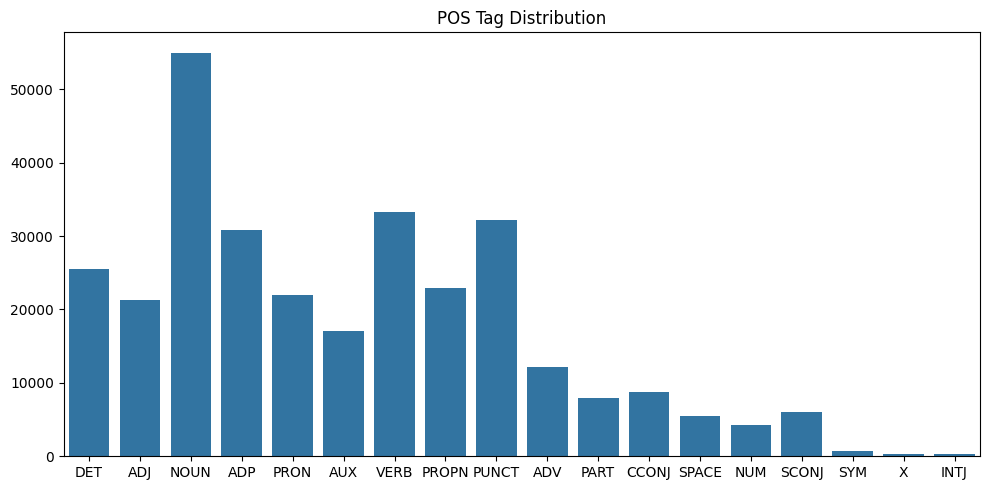

In [20]:

# 8. POS TAG DISTRIBUTION


!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

def get_pos(text):
    doc = nlp(text[:500])  # limit length for speed
    return [token.pos_ for token in doc]

train["pos_tags"] = train["text"].apply(get_pos)
pos_counts = Counter([p for row in train["pos_tags"] for p in row])

plt.figure(figsize=(10,5))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("POS Tag Distribution")
plt.tight_layout()
plt.savefig("plots/pos_distribution.pdf")
plt.show()


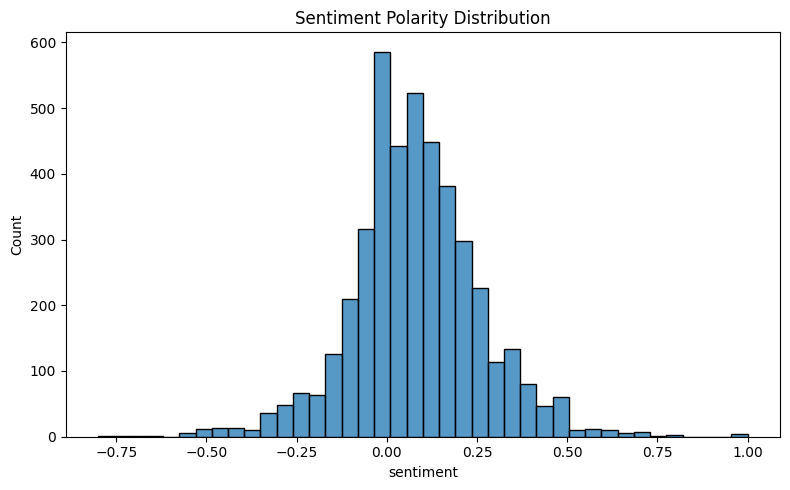

In [21]:

# 9. SENTIMENT ANALYSIS

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

train["sentiment"] = train["text"].apply(get_sentiment)

plt.figure(figsize=(8,5))
sns.histplot(train["sentiment"], bins=40)
plt.title("Sentiment Polarity Distribution")
plt.tight_layout()
plt.savefig("plots/sentiment_distribution.pdf")
plt.show()


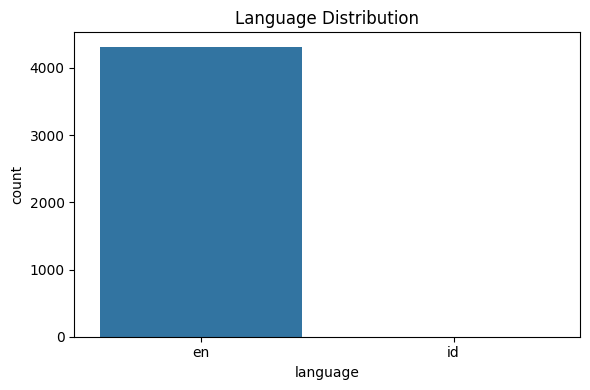

language
en    4314
id       2
Name: count, dtype: int64


In [22]:

# 10. LANGUAGE DETECTION

def detect_lang_safe(text):
    try:
        return detect(text)
    except:
        return "unknown"

train["language"] = train["text"].apply(detect_lang_safe)

plt.figure(figsize=(6,4))
sns.countplot(x=train["language"])
plt.title("Language Distribution")
plt.tight_layout()
plt.savefig("plots/language_distribution.pdf")
plt.show()

print(train["language"].value_counts())


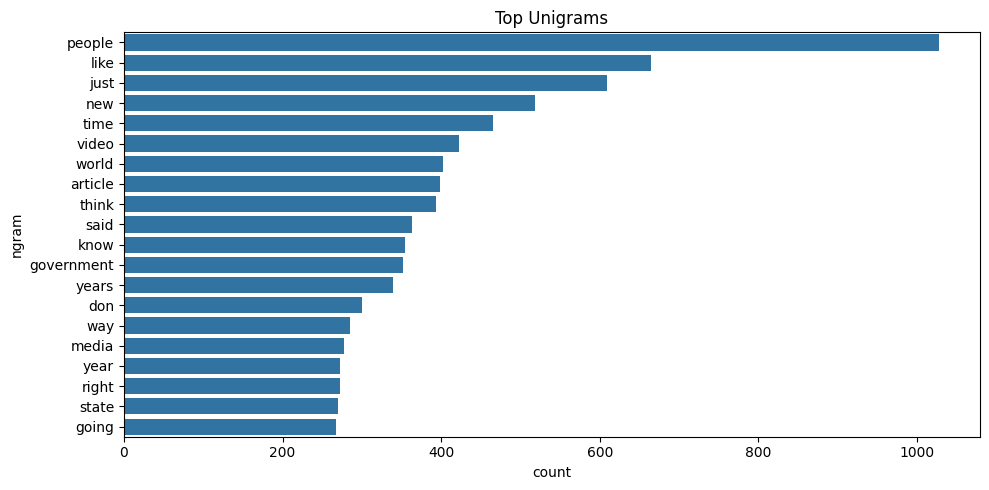

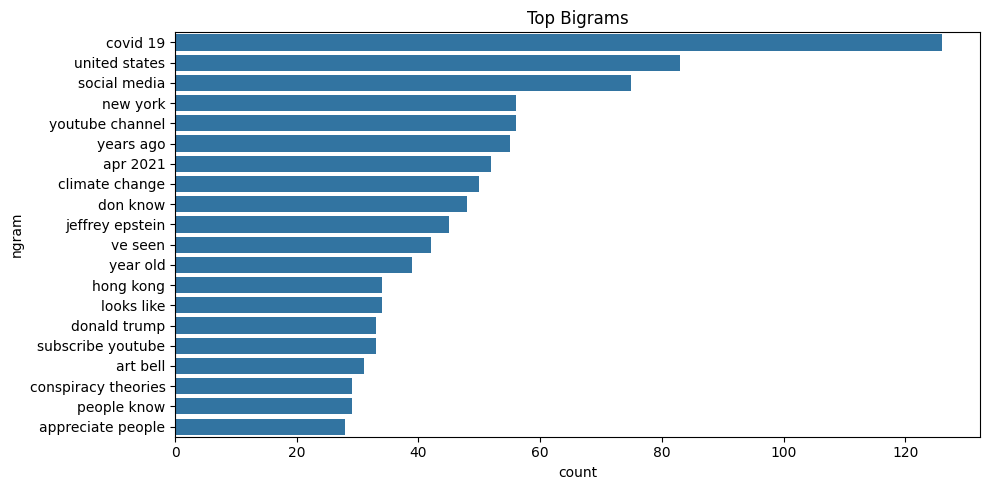

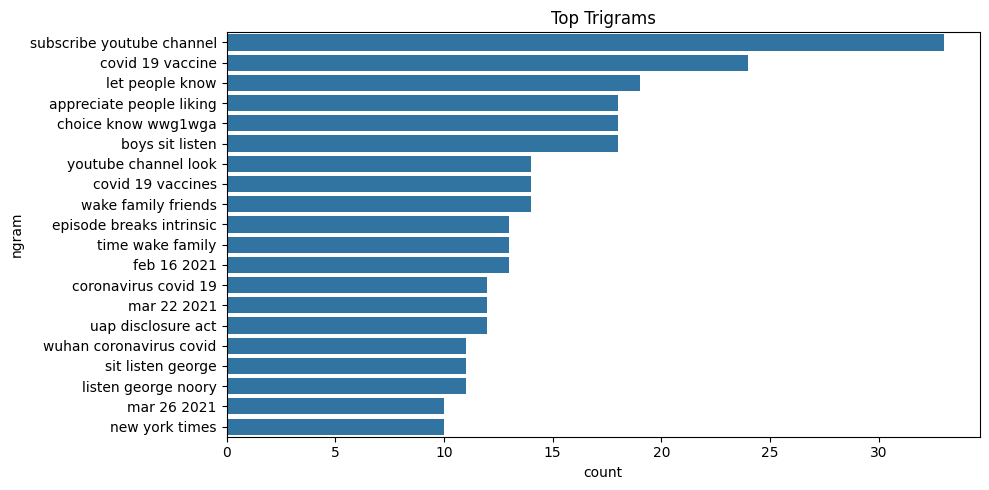

In [23]:
#11. Frequent n-grams (Unigrams, Bigrams, Trigrams

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_ngrams(texts, n, title, filename, top=20):
    vec = CountVectorizer(stop_words='english', ngram_range=(n, n)).fit(texts)
    bag = vec.transform(texts)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top]

    df = pd.DataFrame(words_freq, columns=['ngram', 'count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x="count", y="ngram")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"plots/{filename}.pdf")
    plt.show()

plot_top_ngrams(train["text"], 1, "Top Unigrams", "top_unigrams")
plot_top_ngrams(train["text"], 2, "Top Bigrams", "top_bigrams")
plot_top_ngrams(train["text"], 3, "Top Trigrams", "top_trigrams")


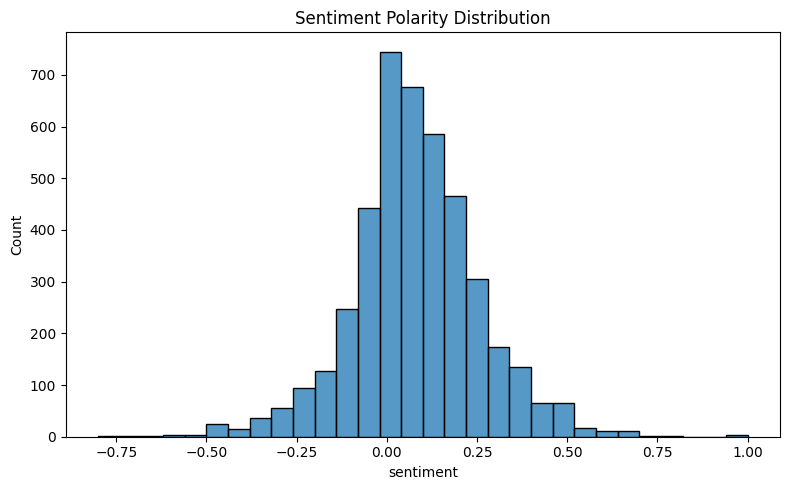

In [24]:
#12. Sentiment Distribution

from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

train["sentiment"] = train["text"].apply(get_sentiment)

plt.figure(figsize=(8,5))
sns.histplot(train["sentiment"], bins=30)
plt.title("Sentiment Polarity Distribution")
plt.tight_layout()
plt.savefig("plots/sentiment_distribution.pdf")
plt.show()


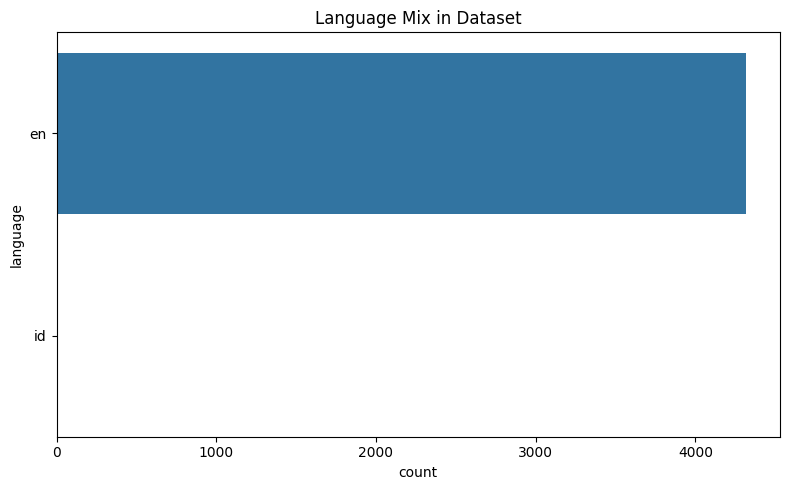

In [25]:
#13. Language Mix Detection

!pip install langdetect

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_lang(text):
    try:
        return detect(text)
    except:
        return "unknown"

train["language"] = train["text"].apply(detect_lang)

plt.figure(figsize=(8,5))
sns.countplot(y=train["language"])
plt.title("Language Mix in Dataset")
plt.tight_layout()
plt.savefig("plots/language_mix.pdf")
plt.show()


Multimodality Eda

So “multimodal” here means:

1. text + conspiracy label

2. text + markers

3. markers + positions inside text

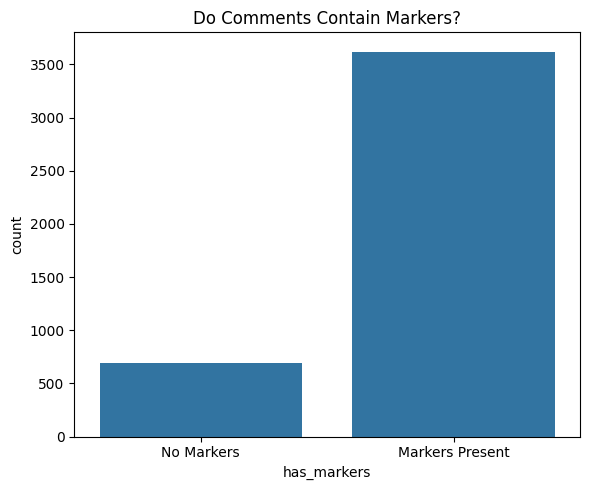

In [26]:
#14. Modality Alignment

train["has_markers"] = train["markers"].apply(lambda m: len(m) > 0)

plt.figure(figsize=(6,5))
sns.countplot(x=train["has_markers"])
plt.title("Do Comments Contain Markers?")
plt.xticks([0,1], ["No Markers", "Markers Present"])
plt.tight_layout()
plt.savefig("plots/modality_alignment.pdf")
plt.show()


In [27]:
#15. Missing Pairs

train["text_empty"] = train["text"].apply(lambda x: len(x.strip()) == 0)

missing_pairs = train.groupby(["text_empty", "has_markers"]).size().reset_index(name="count")
missing_pairs


,text_empty,has_markers,count
0,False,False,695
1,False,True,3621


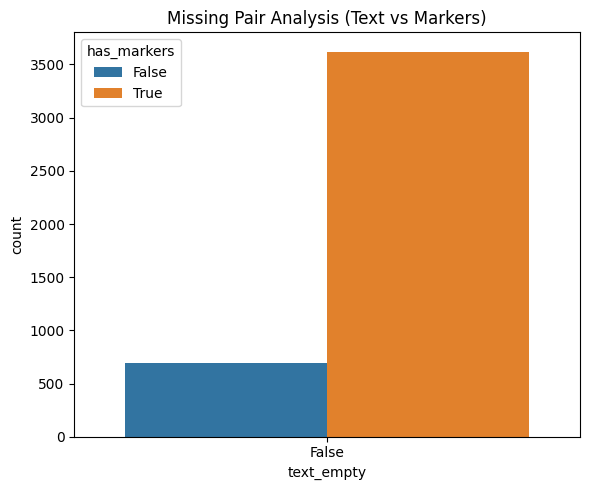

In [30]:

plt.figure(figsize=(6,5))
sns.barplot(data=missing_pairs, x="text_empty", y="count", hue="has_markers")
plt.title("Missing Pair Analysis (Text vs Markers)")
plt.tight_layout()
plt.savefig("plots/missing_pairs.pdf")
plt.show()


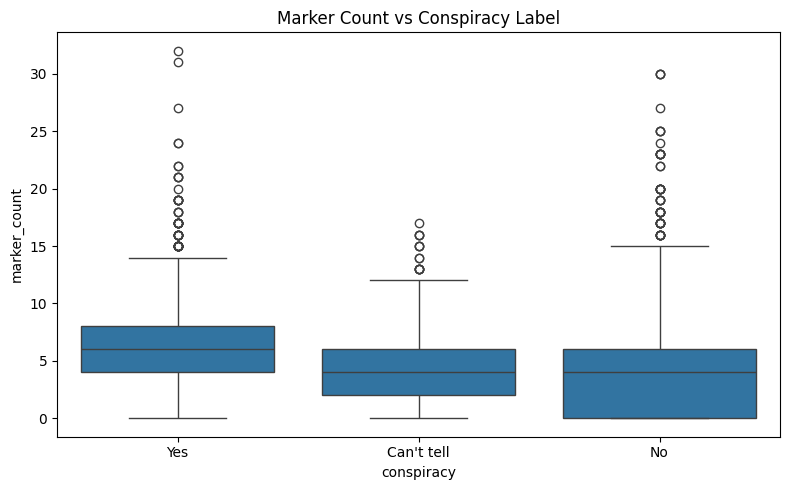

In [31]:
#16. Correlation Between Modalities

train["marker_count"] = train["markers"].apply(len)

plt.figure(figsize=(8,5))
sns.boxplot(data=train, x="conspiracy", y="marker_count")
plt.title("Marker Count vs Conspiracy Label")
plt.tight_layout()
plt.savefig("plots/marker_vs_conspiracy.pdf")
plt.show()


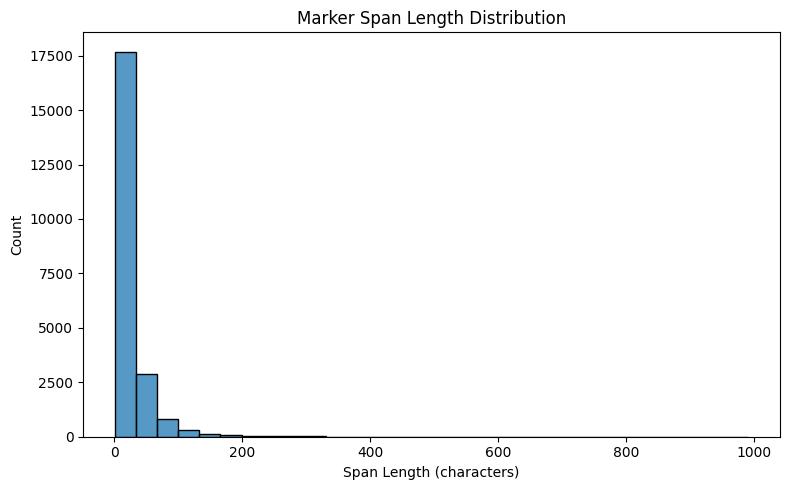

Average span length: 23.42950147962668


In [32]:
# 17. MARKER SPAN LENGTH DISTRIBUTION

def get_span_length(marker):
    return marker["endIndex"] - marker["startIndex"]

all_span_lengths = []
for row in train["markers"]:
    for m in row:
        all_span_lengths.append(get_span_length(m))

plt.figure(figsize=(8,5))
sns.histplot(all_span_lengths, bins=30)
plt.title("Marker Span Length Distribution")
plt.xlabel("Span Length (characters)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/marker_span_length_distribution.pdf")
plt.show()

print("Average span length:", sum(all_span_lengths) / len(all_span_lengths))


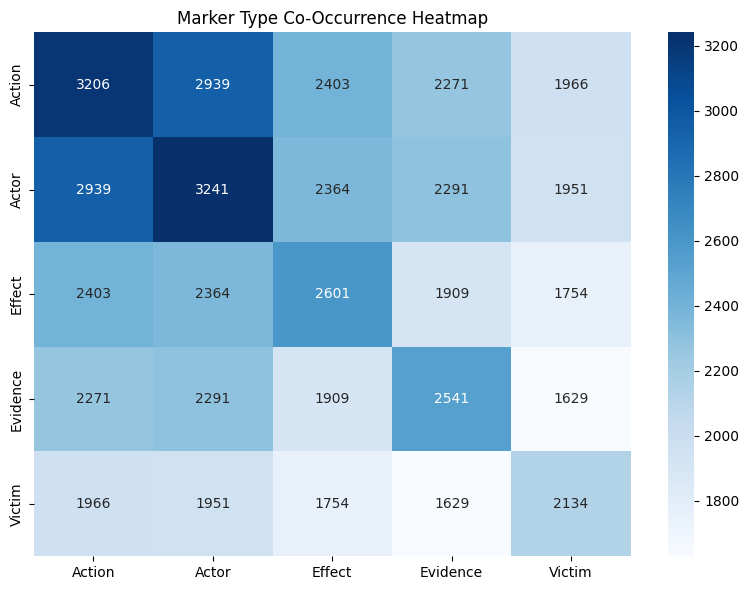

,Action,Actor,Effect,Evidence,Victim
Action,3206,2939,2403,2271,1966
Actor,2939,3241,2364,2291,1951
Effect,2403,2364,2601,1909,1754
Evidence,2271,2291,1909,2541,1629
Victim,1966,1951,1754,1629,2134


In [33]:
# 18. MARKER TYPE CO-OCCURRENCE HEATMAP

import itertools


marker_types = sorted(list(type_counts.keys()))


co_matrix = pd.DataFrame(0, index=marker_types, columns=marker_types)


for markers in train["markers"]:
    types = [m["type"] for m in markers]
    unique_types = list(set(types))


    for t in unique_types:
        co_matrix.loc[t, t] += 1


    for t1, t2 in itertools.combinations(unique_types, 2):
        co_matrix.loc[t1, t2] += 1
        co_matrix.loc[t2, t1] += 1

plt.figure(figsize=(8,6))
sns.heatmap(co_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Marker Type Co-Occurrence Heatmap")
plt.tight_layout()
plt.savefig("plots/marker_cooccurrence_heatmap.pdf")
plt.show()

co_matrix


In [36]:
# 19. EXAMPLE MARKER SPANS (for report)

examples = []

for i, row in train.iterrows():
    text = row["text"]
    for m in row["markers"]:
        start = m["startIndex"]
        end = m["endIndex"]
        span = text[start:end]

        examples.append({
            "index": i,
            "marker_type": m["type"],
            "span": span,
            "text_snippet": text[max(0,start-30):min(len(text),end+30)]
        })

    if len(examples) >= 5:
        break

examples_df = pd.DataFrame(examples)
print(examples_df)


   index marker_type       span  \
0      0    Evidence    article   
1      0      Victim   Bolivia,   
2      0       Actor         US   
3      0      Action      coups   
4      0      Victim  Bolivia's   

                                        text_snippet  
0      A great article on what's taking place in Bol  
1  cle on what's taking place in Bolivia, referen...  
2  via, referencing some similar US backed coups ...  
3  encing some similar US backed coups in the reg...  
4  as well as recounting some of Bolivia's histor...  


In [35]:
# 20. ANNOTATION CONSISTENCY CHECKS

invalid_span_order = 0
out_of_bounds = 0
overlaps = 0

for i, row in train.iterrows():
    text_len = len(row["text"])
    spans = []

    for m in row["markers"]:
        start = m["startIndex"]
        end = m["endIndex"]

        if start >= end:
            invalid_span_order += 1


        if start < 0 or end > text_len:
            out_of_bounds += 1

        spans.append((start, end))

    spans = sorted(spans, key=lambda x: x[0])
    for j in range(len(spans) - 1):
        if spans[j][1] > spans[j+1][0]:
            overlaps += 1

print("Invalid start/end order:", invalid_span_order)
print("Out-of-bound spans:", out_of_bounds)
print("Overlapping spans:", overlaps)


Invalid start/end order: 0
Out-of-bound spans: 0
Overlapping spans: 1627
